In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
from torch import nn
import pandas as pd
%matplotlib inline

In [2]:
torch.manual_seed(2)

In [3]:
n_points = 500
X, y = datasets.make_circles(n_samples=n_points, noise = 0.1, factor=0.2, random_state=123,)

In [5]:
data_df = np.column_stack((X, y))
df = pd.DataFrame(data_df, columns = ['X1', 'X2', 'Label'])
df.head()

,X1,X2,Label
0,0.698554,-0.378290,0.0
1,-0.248422,0.191071,1.0
2,-0.178759,0.253697,1.0
3,-0.007305,-0.259267,1.0
4,-0.159844,0.266916,1.0


In [6]:
df_lbl0 = df[df['Label'] == 0]
df_lbl1 = df[df['Label'] == 1]

In [7]:
def scatter_plot():
    plt.scatter(df_lbl0['X1'], df_lbl0['X2'])
    plt.scatter(df_lbl1['X1'], df_lbl1['X2'])
    plt.show()

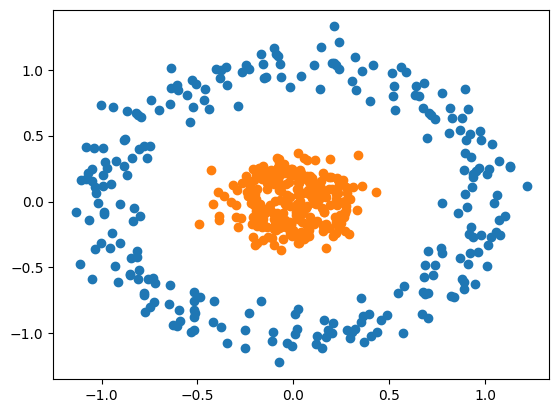

In [8]:
scatter_plot()

In [48]:
class Model(nn.Module):
    def __init__(self, input_size, h1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(in_features = input_size, out_features = h1)
        self.linear2 = nn.Linear(in_features = h1, out_features = output_size)

    def forward(self, X):
        X = torch.sigmoid(self.linear1(X))
        X = torch.sigmoid(self.linear2(X))
        return X

    def predict(self, X):
        return '1' if self.forward(X) >= 0.5 else '0'

In [49]:
model = Model(input_size = 2, h1 = 4, output_size = 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1709,  0.2116],
        [-0.4642,  0.1464],
        [ 0.2193, -0.6422],
        [-0.6063, -0.3631]], requires_grad=True), Parameter containing:
tensor([-0.1212, -0.3806,  0.6535, -0.2591], requires_grad=True), Parameter containing:
tensor([[ 0.1730, -0.4273, -0.4068, -0.2990]], requires_grad=True), Parameter containing:
tensor([0.2685], requires_grad=True)]


In [50]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.1709,  0.2116],
                      [-0.4642,  0.1464],
                      [ 0.2193, -0.6422],
                      [-0.6063, -0.3631]])),
             ('linear1.bias', tensor([-0.1212, -0.3806,  0.6535, -0.2591])),
             ('linear2.weight',
              tensor([[ 0.1730, -0.4273, -0.4068, -0.2990]])),
             ('linear2.bias', tensor([0.2685]))])

In [51]:
summary(model, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 4]                   12
├─Linear: 1-2                            [-1, 1]                   5
Total params: 17
Trainable params: 17
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 4]                   12
├─Linear: 1-2                            [-1, 1]                   5
Total params: 17
Trainable params: 17
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [52]:
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset = dataset, shuffle = True, batch_size = 100)

C:\Users\moham\AppData\Local\Temp\ipykernel_30112\1476460691.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_t = torch.tensor(y, dtype = torch.float32)


AssertionError: Size mismatch between tensors

In [53]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [54]:
EPOCHS = 1000
Lossess = []
for epoch in range(EPOCHS):
    loss = 0
    for x, y in dataloader:
        y_pred = model.forward(x)
        loss = criterion(y_pred, y.view(-1,1))
        Lossess.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f' Epoch : {epoch} , loss : {loss} ')
        

 Epoch : 0 , loss : 0.7185102105140686 
 Epoch : 0 , loss : 0.6908082365989685 
 Epoch : 0 , loss : 0.7019318342208862 
 Epoch : 0 , loss : 0.7241941690444946 
 Epoch : 0 , loss : 0.758225679397583 
 Epoch : 1 , loss : 0.719086229801178 
 Epoch : 1 , loss : 0.691577672958374 
 Epoch : 1 , loss : 0.6974310278892517 
 Epoch : 1 , loss : 0.6962752342224121 
 Epoch : 1 , loss : 0.7004287838935852 
 Epoch : 2 , loss : 0.7060829401016235 
 Epoch : 2 , loss : 0.703564465045929 
 Epoch : 2 , loss : 0.6928367018699646 
 Epoch : 2 , loss : 0.6928982734680176 
 Epoch : 2 , loss : 0.6836196780204773 
 Epoch : 3 , loss : 0.6875331997871399 
 Epoch : 3 , loss : 0.6874329447746277 
 Epoch : 3 , loss : 0.6801225543022156 
 Epoch : 3 , loss : 0.6800581216812134 
 Epoch : 3 , loss : 0.6902963519096375 
 Epoch : 4 , loss : 0.6810869574546814 
 Epoch : 4 , loss : 0.6798325181007385 
 Epoch : 4 , loss : 0.6817752122879028 
 Epoch : 4 , loss : 0.6861945390701294 
 Epoch : 4 , loss : 0.6658074259757996 
 Epo

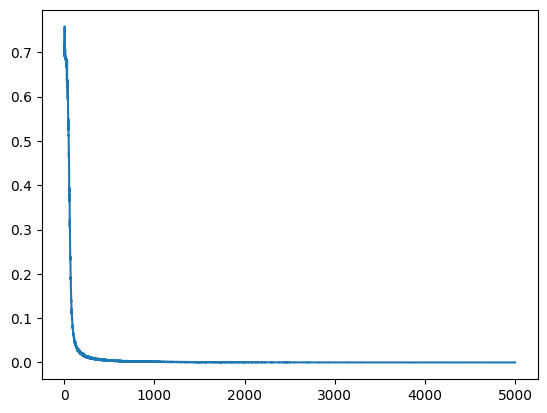

In [55]:
plt.plot(range(5000), Lossess)
plt.show()

In [114]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:,0]) - 0.25,max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25,max(X[:,1]) + 0.25 )
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy , z)

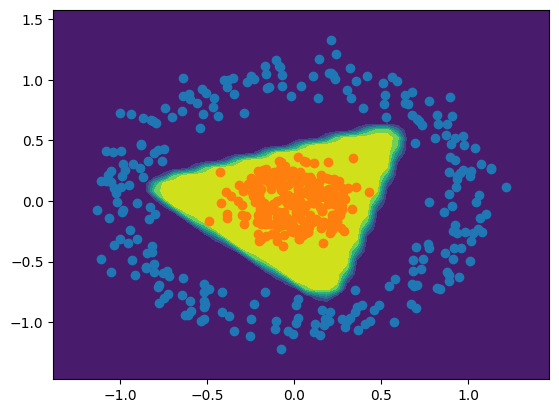

In [115]:
plot_decision_boundary(X_t, y_t)
scatter_plot()

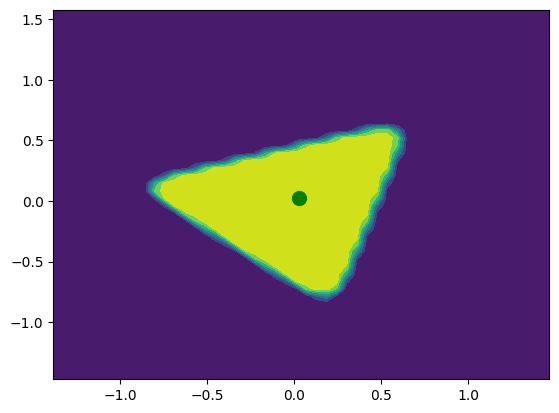

In [124]:
x = 0.025
y = 0.025
point1 = torch.tensor([x, y])
prediction = model.predict(point1)
plt.plot([x], [y] , marker = 'o', markersize = 10, color = 'green')
plot_decision_boundary(X_t, y_t)